# F61 BLM 08 analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nxcals.api.extraction.data.builders import *
from scipy.optimize import curve_fit
from datetime import datetime

In [45]:
# build the query and load data into spark dataframe UTC Time
start = "2022-09-28 11:00:00.000"
end = "2022-09-28 17:00:00.000"
df = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("F61.BLM008-ST/Samples").build().toPandas()

In [46]:
df.head(1)

__record_timestamp__  __record_version__             acqStamp  \
0   1664362903900238525                   0  1664362903900238525   

   basicPeriodMilliSecond beamDestinationName           class  cycleDuration  \
0                     NaN                None  XenericSampler            NaN   

   cyclePosition  cycleTimeStamp cycleUserName  ...  property  \
0            NaN             NaN          None  ...   Samples   

                                             samples  samples_units  \
0  {'elements': [-0.00795, 0.009089999999999999, ...           None   

  samplingStates samplingTrain samplingTrain_units        selector  \
0            NaN           1.0                None  CPS.USER.EAST2   

  superCycleDuration timeUnitFactor nxcals_entity_id  
0                NaN          0.001          9404722  

[1 rows x 30 columns]

In [53]:
df.selector.unique()

array(['CPS.USER.EAST2', 'CPS.USER.EAST4', 'CPS.USER.EAST3'], dtype=object)

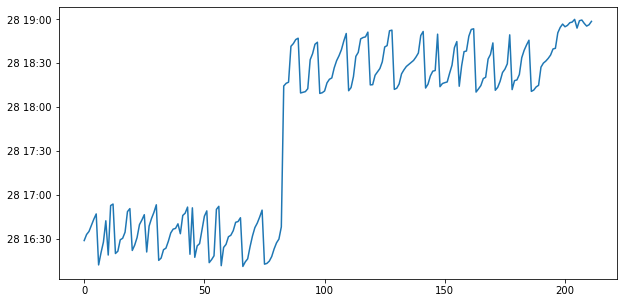

In [51]:
# t_qfn01 = [datetime.fromtimestamp(ts) for ts in df_qfn01.loc[df_qfn01.selector == "CPS.USER.MD1"].acqStamp/1e9]
# t_qdn02 = [datetime.fromtimestamp(ts) for ts in df_qdn02.loc[df_qdn02.selector == "CPS.USER.MD1"].acqStamp/1e9]
# t_qfn03 = [datetime.fromtimestamp(ts) for ts in df_qfn03.loc[df_qfn03.selector == "CPS.USER.MD1"].acqStamp/1e9]

# fig, ax = plt.subplots(figsize=(10,5))
# ax.scatter(t_qfn01,df_qfn01.loc[df_qfn01.selector == "CPS.USER.MD1"].VALUE, s=5, label="QFN01")
# ax.scatter(t_qdn02,df_qdn02.loc[df_qdn02.selector == "CPS.USER.MD1"].VALUE, s=5, label="QDN02")
# ax.scatter(t_qfn03,df_qfn03.loc[df_qfn03.selector == "CPS.USER.MD1"].VALUE, s=5, label="QFN03")
# ax.set_xlabel("Time UTC")
# ax.set_ylabel("Current [A]")
# ax.set_title("QFN01")
# ax.legend()

t = [datetime.fromtimestamp(ts) for ts in df.loc[df.selector == "CPS.USER.EAST3"].acqStamp/1e9]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(t)
# ax.scatter(t, df.loc[df.selector == "CPS.USER.MD1"].samples["elements"][0], s=5, label="QFN01")
# ax.set_xlabel("Time UTC")
# ax.set_ylabel("Current [A]")
# ax.set_title("QFN01")
# ax.legend()

In [27]:
df.iloc[0]

__record_timestamp__                                    1664370235900238525
__record_version__                                                        0
acqStamp                                                1664370235900238525
basicPeriodMilliSecond                                                  NaN
beamDestinationName                                                    None
class                                                        XenericSampler
cycleDuration                                                           NaN
cyclePosition                                                           NaN
cycleTimeStamp                                                          NaN
cycleUserName                                                          None
cyclestamp                                              1664370235900000000
device                                                        F61.BLM008-ST
firstSampleTime                                                         0.0
firstSampleT

In [14]:
df.iloc[0].samples

{'elements': array([-0.00795,  0.01861,  0.01066, ...,  1.70287,  1.69492,  1.68697]),
 'dimensions': array([   1, 3597], dtype=int32)}

In [30]:
df.iloc[0].samples["elements"]

array([-7.9500000e-03, -7.5700000e-03,  8.2800000e-03, ...,
        1.7870481e+02,  1.7872423e+02,  1.7871628e+02])

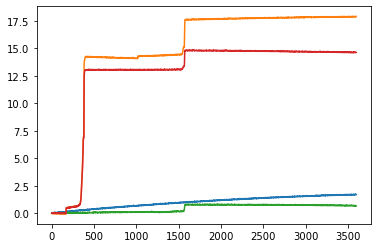

In [17]:
fig, ax = plt.subplots()
ax.plot(df.iloc[0].samples["elements"])
ax.plot(df.iloc[1].samples["elements"])
ax.plot(df.iloc[2].samples["elements"])
ax.plot(df.iloc[3].samples["elements"])

In [12]:
# build the query and load data into spark dataframe UTC Time
start = "2022-09-28 11:00:00.000"
end = "2022-09-28 17:00:00.000"
df2 = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("F61.BLM008/Acquisition").build().toPandas()

In [13]:
df2.selector.unique()

array(['CPS.USER.TOF', 'CPS.USER.ZERO', 'CPS.USER.MD2', 'CPS.USER.EAST4',
       'CPS.USER.EAST2', 'CPS.USER.AD', 'CPS.USER.MD4', 'CPS.USER.MD6',
       'CPS.USER.MD3', 'CPS.USER.LHC2', 'CPS.USER.MD7', 'CPS.USER.EAST3',
       'CPS.USER.SFTPRO1', 'CPS.USER.LHCPILOT', 'CPS.USER.LHC4'],
      dtype=object)

In [16]:
df2.head(1)

__record_timestamp__  __record_version__             acqStamp alarmStatus  \
0   1664363121100000000                   0  1664363122751000000        None   

  channelStatus           class           cyclestamp      device  \
0          None  BLMINJ_Virtual  1664363121100000000  F61.BLM008   

  hwDumpStatusBeamPresence  hwThresholdsBeamPresence  ...  lossCycle  lossRS1  \
0                     None                       NaN  ...        NaN      NaN   

   lossRS2  lossRS3     property      selector swDumpStatusBeamPresence  \
0      NaN      NaN  Acquisition  CPS.USER.TOF                    False   

  swInterlockBeamPresenceMask  swThresholdsBeamPresence nxcals_entity_id  
0                        None                       0.0          9405292  

[1 rows x 22 columns]

In [21]:
df2.keys()

Index(['__record_timestamp__', '__record_version__', 'acqStamp', 'alarmStatus',
       'channelStatus', 'class', 'cyclestamp', 'device',
       'hwDumpStatusBeamPresence', 'hwThresholdsBeamPresence', 'lossAmbient',
       'lossBeamPresence', 'lossCycle', 'lossRS1', 'lossRS2', 'lossRS3',
       'property', 'selector', 'swDumpStatusBeamPresence',
       'swInterlockBeamPresenceMask', 'swThresholdsBeamPresence',
       'nxcals_entity_id'],
      dtype='object')

In [24]:
df2.loc[df2.selector == "CPS.USER.MD3"].lossBeamPresence

48       0.019964
76       0.024956
114      0.072800
125      0.059712
250      0.021623
           ...   
13151    0.022433
13160    1.066921
13186    0.107135
13198    0.060474
13223    0.126427
Name: lossBeamPresence, Length: 431, dtype: float64